# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 10.9987396282944392, performing 41.3 it/sec
Step 100: Loss = 2.0312957783905095, performing 100.9 it/sec
Step 200: Loss = 0.1719594548502688, performing 101.6 it/sec
Step 300: Loss = 0.0231821571883811, performing 139.8 it/sec
No improvement since Step 313, early stopping.
[Best]  Step 312: Loss = 0.0094719651717842
[Final] Step 362: Loss = 0.0127950621718520

predicted end states
------------------------------------
         5th       Mean      95th
RISC-1  1.52e-06  1.52e-06  1.52e-06
RISC-2  9.80e-12  9.80e-12  9.80e-12
RISC-3  1.75e-07  1.75e-07  1.75e-07
RISC-4  1.02e-11  1.02e-11  1.02e-11
RISC-5  1.02e-11  1.02e-11  1.02e-11
RISC-6  1.00e-11  1.00e-11  1.00e-11
RISC-7  1.01e-11  1.01e-11  1.01e-11
RISC-8  9.85e-12  9.85e-12  9.85e-12


predicted conditional events
----------------------------------------
             5th    

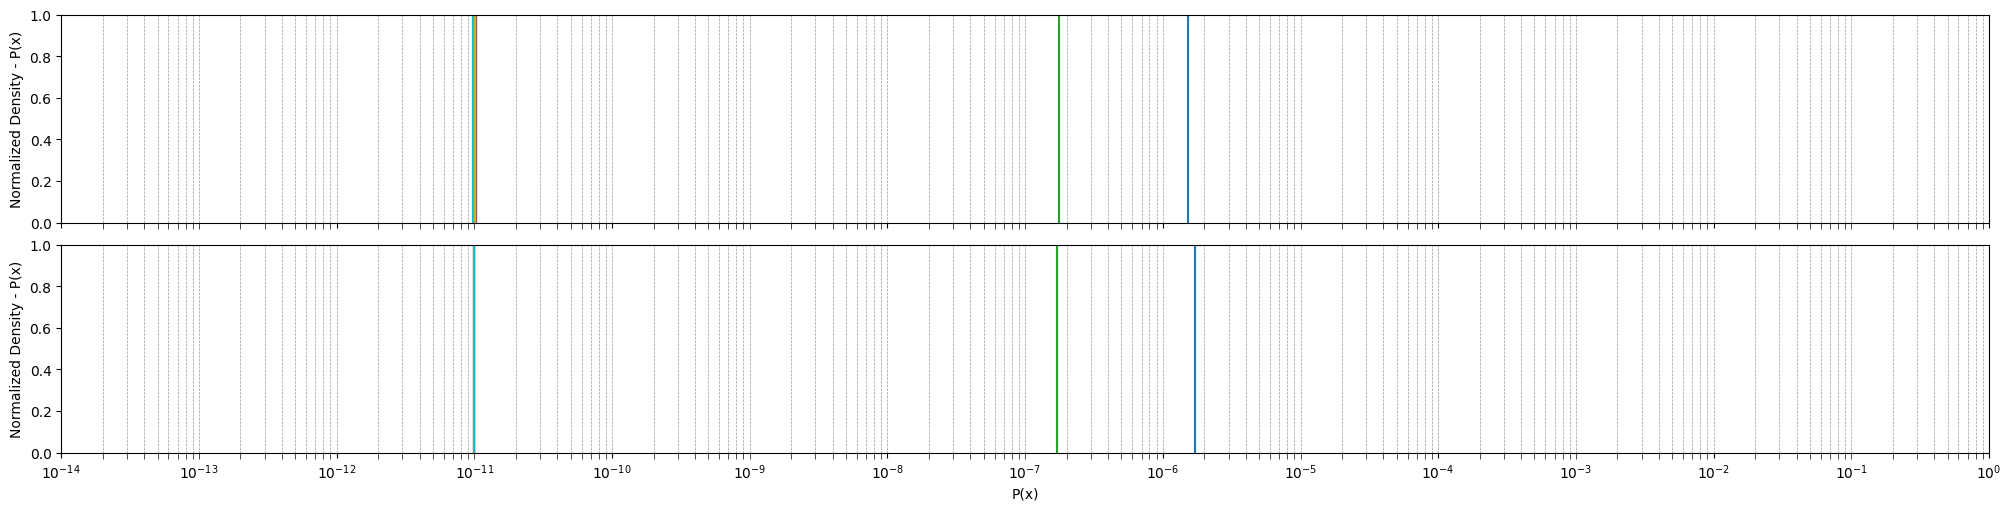

In [3]:
tunable = {
 'num_samples': 1000,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 1.7e-6,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['RISC', 'RSIG', 'RROD', 'PRUN', 'BPHR', 'DHRS', 'DHRL|DHRS', 'DHRL|~DHRS'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    # 'RISC-0': {
    #     'sequence': [0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    #     'probability': 1 - 7.7e-3 - 6.5e-11 - 4.41e-11 - 1e-11 - 1e-11 - 3.49e-8 - 7.0e-11 - 2.5e-8
    # },
    'RISC-1': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, np.nan, 0],
        'probability': 1.7e-6,
    },
    'RISC-2': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, np.nan, 1],
        'probability': 1e-11,
    },
    'RISC-3': {
        'sequence': [1, 0, 0, np.nan, 1, 0, 0, np.nan],
        'probability': 1.7e-7,
    },
    'RISC-4': {
        'sequence': [1, 0, 0, np.nan, 1, 0, 1, np.nan],
        'probability': 1e-11,
    },
    'RISC-5': {
        'sequence': [1, 0, 0, np.nan, 1, 1, np.nan, np.nan],
        'probability': 1e-11,
    },
    'RISC-6': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, np.nan, np.nan],
        'probability': 1e-11,
    },
    'RISC-7': {
        'sequence': [1, 0, 1, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 1e-11,
    },
    'RISC-8': {
        'sequence': [1, 1,np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1e-11,

    },


}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_metrics=False)